In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [181]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/total.CSV",encoding='euc-kr')
df

,No_Die,Lot_Num,Wafer_Num,Datetime,Ox_Chamber,type,Temp_OXid,ppm,Pressure,Oxid_time,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,NOLSM325131325,13,28,01-03-2019,2,dry,1214.307948,26.69,0.203,120,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141
1,NOLSM326132326,13,29,01-03-2019,2,dry,978.110792,30.86,0.217,137,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55
2,NOLSM327133327,13,30,01-03-2019,2,dry,1176.019149,31.07,0.218,116,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96
3,NOLSM328134328,13,31,01-03-2019,2,dry,933.442733,31.04,0.196,143,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105
4,NOLSM329135329,13,32,01-03-2019,2,wet,1140.598752,31.37,0.215,76,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2019,3,wet,1275.182502,45.10,0.214,21,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78
1700,NOLSM8493212,32,12,28-02-2019,1,wet,1268.105427,45.07,0.215,22,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42
1701,NOLSM8503213,32,13,28-02-2019,1,wet,1279.160563,45.12,0.214,21,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,42
1702,NOLSM8513214,32,14,28-02-2019,1,wet,1272.804948,45.34,0.213,20,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,24


In [183]:
df.drop(['No_Die','Datetime','Lot_Num','Wafer_Num'] ,axis = 1, inplace = True)

In [184]:
df

,Ox_Chamber,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,2,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141
1,2,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55
2,2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96
3,2,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105
4,2,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,3,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78
1700,1,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42
1701,1,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,42
1702,1,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,24


In [185]:
df.drop(['Ox_Chamber','lithography_Chamber','Chamber_Num'], axis = 1, inplace = True)

In [186]:
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,pressure_HMDS,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,15.006,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141
1,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,15.059,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55
2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,14.930,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96
3,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,14.947,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105
4,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,14.820,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,15.005,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78
1700,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,14.949,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42
1701,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,14.978,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,42
1702,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,15.050,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,24


In [187]:
df['Etching_Chamber'] = df['Etching_Chamber'].astype('str')
df['photo_soft_Chamber'] = df['photo_soft_Chamber'].astype('str')

In [188]:
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,photo_soft_Chamber,resist_target,N2_HMDS,pressure_HMDS,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,dry,1214.307948,26.69,0.203,120,713.132,1,1.46994,17.367,15.006,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141
1,dry,978.110792,30.86,0.217,137,714.295,1,0.86579,16.090,15.059,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55
2,dry,1176.019149,31.07,0.218,116,710.114,1,0.90483,19.026,14.930,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96
3,dry,933.442733,31.04,0.196,143,710.617,1,0.42197,18.891,14.947,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105
4,wet,1140.598752,31.37,0.215,76,711.632,1,1.70139,13.788,14.820,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,3,0.89644,16.029,15.005,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78
1700,wet,1268.105427,45.07,0.215,22,707.179,1,1.02384,17.587,14.949,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42
1701,wet,1279.160563,45.12,0.214,21,712.946,1,1.02634,16.445,14.978,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,42
1702,wet,1272.804948,45.34,0.213,20,711.987,1,0.56833,15.306,15.050,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,24


# 회귀분석

In [18]:
df.corr().round(3)

,Lot_Num,Wafer_Num,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
Lot_Num,1.000,-0.012,0.133,0.111,0.484,-0.243,0.326,-0.165,0.178,-0.047,...,-0.023,-0.198,-0.162,-0.112,NaN,0.462,-0.047,-0.034,-0.020,-0.050
Wafer_Num,-0.012,1.000,0.045,0.044,-0.048,-0.309,0.014,0.110,0.067,0.002,...,-0.020,0.008,-0.006,0.006,NaN,-0.011,0.003,0.013,0.012,-0.072
Temp_OXid,0.133,0.045,1.000,0.748,0.079,-0.463,0.058,0.113,-0.072,0.015,...,-0.023,0.024,-0.036,0.021,NaN,-0.026,-0.375,-0.380,-0.381,-0.055
ppm,0.111,0.044,0.748,1.000,0.064,-0.487,0.055,0.114,-0.071,0.040,...,-0.014,0.012,0.004,0.056,NaN,-0.014,-0.344,-0.330,-0.361,-0.024
Pressure,0.484,-0.048,0.079,0.064,1.000,-0.036,0.316,-0.016,0.135,-0.019,...,-0.012,-0.081,-0.114,-0.068,NaN,0.311,0.130,-0.139,0.137,0.155
Oxid_time,-0.243,-0.309,-0.463,-0.487,-0.036,1.000,-0.078,-0.075,-0.013,-0.030,...,0.029,0.027,0.064,0.001,NaN,-0.098,0.229,0.165,0.191,0.039
thickness,0.326,0.014,0.058,0.055,0.316,-0.078,1.000,0.008,0.054,-0.050,...,-0.035,-0.060,-0.038,-0.001,NaN,0.196,0.129,-0.166,0.127,0.165
resist_target,-0.165,0.110,0.113,0.114,-0.016,-0.075,0.008,1.000,-0.057,0.048,...,-0.004,0.041,0.041,-0.002,NaN,-0.114,-0.103,-0.102,-0.104,0.179
N2_HMDS,0.178,0.067,-0.072,-0.071,0.135,-0.013,0.054,-0.057,1.000,-0.067,...,-0.135,-0.139,-0.021,-0.031,NaN,0.083,0.037,0.052,0.055,-0.009
pressure_HMDS,-0.047,0.002,0.015,0.040,-0.019,-0.030,-0.050,0.048,-0.067,1.000,...,-0.013,0.039,-0.006,0.017,NaN,-0.002,0.012,-0.025,-0.023,-0.022


In [125]:
reg_model = smf.ols(formula = "Target ~ Lot_Num+ Wafer_Num + C(type) + Temp_OXid + ppm + Pressure + Oxid_time + thickness + C(photo_soft_Chamber) + resist_target + N2_HMDS + pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2+ spin3 + photoresist_bake + temp_softbake + time_softbake + Line_CD + Wavelength +Resolution + Energy_Exposure +  C(Etching_Chamber) + Thin F4 + Thin F3+ Thin F2 + Thin F1 + Temp_Etching +Source_Power +Selectivity + Flux60 + Flux90s + Flux160s + Flux480s + Flux840s + input_Energy + Temp_implantation + Furance_Temp + RTA_Temp", data = df)
reg_result = reg_model.fit()

print(reg_result.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

# 의사결정나무

In [189]:
df_y = df['Target']
df_x = df.drop('Target', axis = 1, inplace = False)

In [190]:
df_x_dummy = pd.get_dummies(df_x)

In [191]:
df_x_dummy

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,Furance_Temp,RTA_Temp,type_dry,type_wet,photo_soft_Chamber_1,photo_soft_Chamber_2,photo_soft_Chamber_3,Etching_Chamber_1,Etching_Chamber_2,Etching_Chamber_3
0,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,20.001,200.551,...,854.0,154,1,0,1,0,0,1,0,0
1,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,19.993,199.835,...,895.0,156,1,0,1,0,0,0,1,0
2,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,19.995,202.118,...,898.0,152,1,0,1,0,0,0,0,1
3,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,20.004,194.668,...,879.0,155,1,0,1,0,0,1,0,0
4,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,19.998,202.192,...,882.0,155,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,19.998,204.429,...,868.0,152,0,1,0,0,1,0,0,1
1700,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,20.000,204.266,...,867.0,152,0,1,1,0,0,0,0,1
1701,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,19.994,203.401,...,868.0,152,0,1,1,0,0,0,1,0
1702,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,20.002,203.670,...,868.0,152,0,1,1,0,0,1,0,0


In [192]:
# train, test 분리 6:4 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_y,
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1022, 45)
train data Y size : (1022,)
test data X size : (682, 45)
test data Y size : (682,)


In [193]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.266


In [194]:
train_score =[]
test_score=[]

#para_leaf는 [1, 2, 3~ ~ 19]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.266
1,2,0.917,0.408
2,3,0.866,0.412
3,4,0.837,0.410
4,5,0.819,0.413
5,6,0.787,0.509
6,7,0.757,0.459
7,8,0.743,0.451
8,9,0.736,0.389
9,10,0.705,0.417


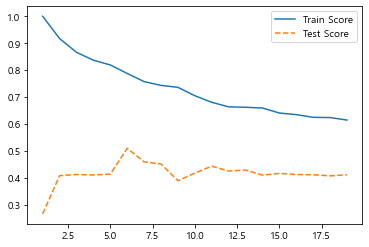

In [195]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

# 잎사귀 최소자료수 8

In [196]:
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.787,0.509
1,6,0.787,0.509
2,8,0.787,0.509
3,10,0.787,0.509
4,12,0.787,0.509
5,14,0.777,0.489
6,16,0.766,0.485
7,18,0.761,0.517
8,20,0.750,0.510
9,22,0.723,0.480


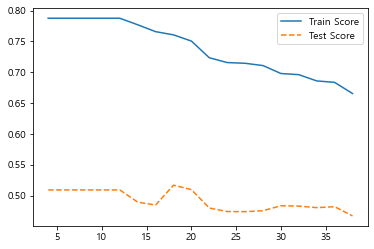

In [197]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# 분리노드 = 16

In [198]:
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6, min_samples_split=17
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.192,0.150
1,2,0.305,0.259
2,3,0.438,0.406
3,4,0.528,0.476
4,5,0.603,0.492
5,6,0.666,0.486
6,7,0.703,0.482
7,8,0.730,0.492
8,9,0.749,0.483
9,10,0.757,0.491


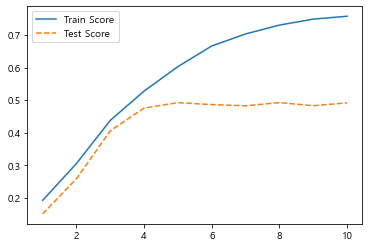

In [199]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()
# 깊이 4

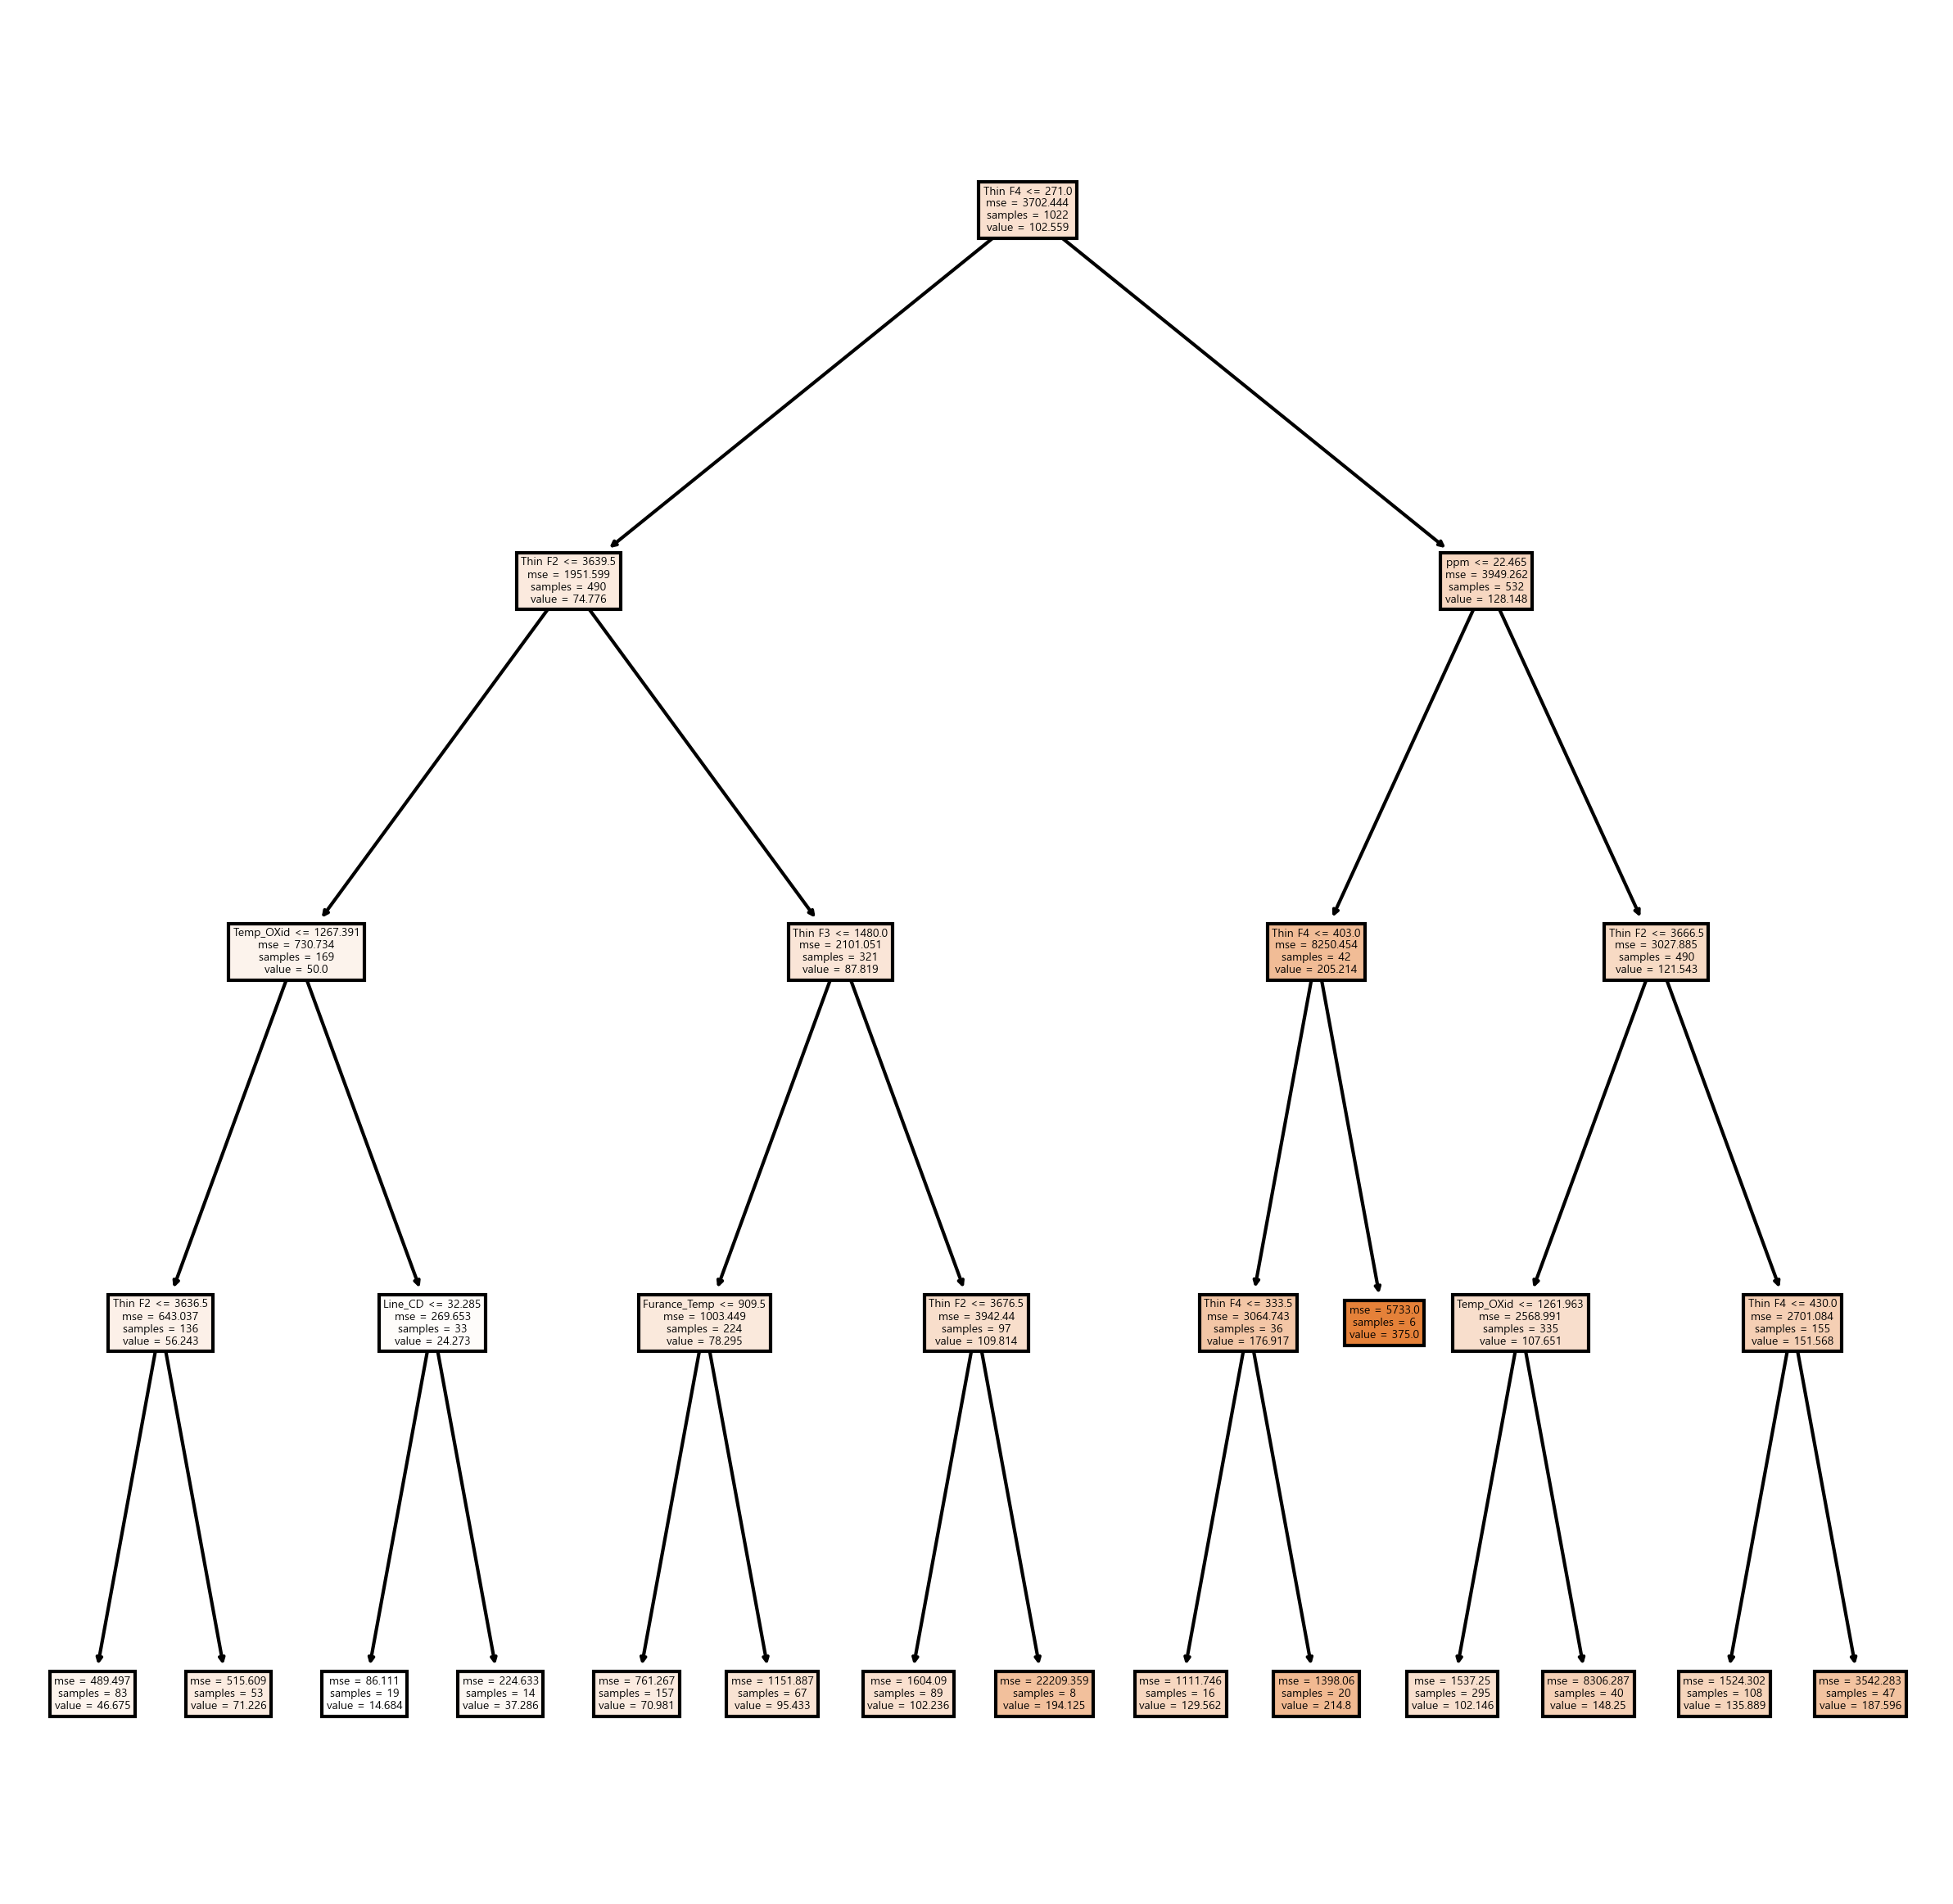

In [233]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 17, max_depth = 4, random_state=1234 )
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [234]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
21,Thin F4,0.541
23,Thin F2,0.222
1,ppm,0.136
0,Temp_OXid,0.051
22,Thin F3,0.034
35,Furance_Temp,0.014
17,Line_CD,0.002
26,Source_Power,0.000
28,Flux60s,0.000
29,Flux90s,0.000


Text(0, 0.5, '변수')

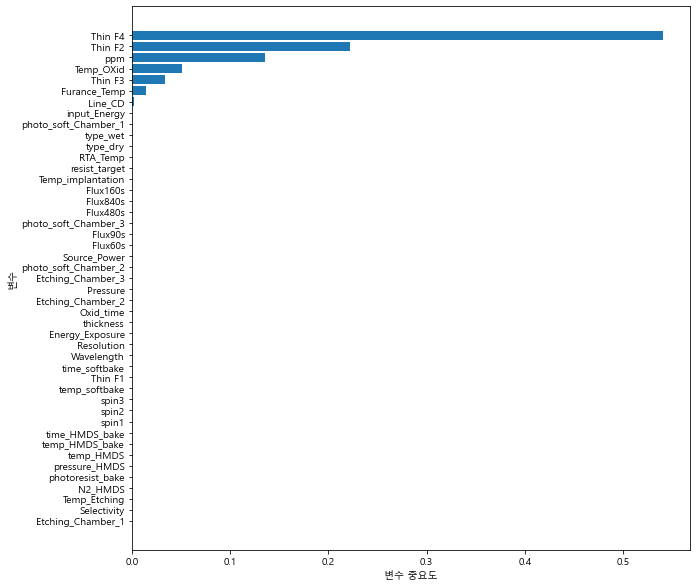

In [235]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])

plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [204]:
print('Score on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.528
Score on test set : 0.476


# 랜덤포레스트

In [153]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_y,
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1022, 47)
train data Y size : (1022,)
test data X size : (682, 47)
test data Y size : (682,)


In [205]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.942
Score on test set : 0.697


In [206]:
train_score =[]
test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [207]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.924,0.666
1,20,0.945,0.694
2,30,0.945,0.694
3,40,0.942,0.700
4,50,0.944,0.701
5,60,0.944,0.701
6,70,0.944,0.701
7,80,0.943,0.701
8,90,0.943,0.699
9,100,0.942,0.697


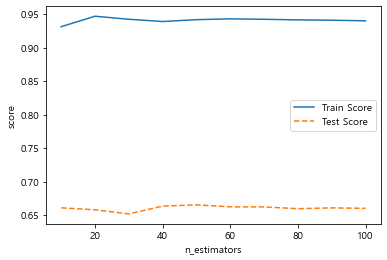

In [157]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

# 100

In [208]:
train_score =[]
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf =RandomForestRegressor(random_state = 1234,n_estimators =100,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.942,0.697
1,2,0.905,0.682
2,3,0.874,0.662
3,4,0.846,0.645
4,5,0.818,0.634
5,6,0.798,0.622
6,7,0.777,0.609
7,8,0.759,0.595
8,9,0.745,0.586
9,10,0.730,0.579


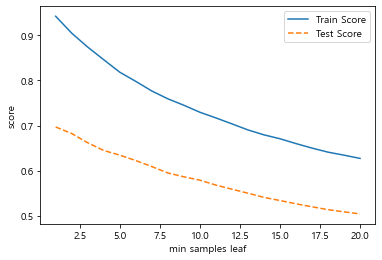

In [209]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

# 5

In [210]:
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, min_samples_leaf=5,
                         n_estimators =100, min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.818,0.634
1,6,0.818,0.634
2,8,0.818,0.634
3,10,0.818,0.634
4,12,0.807,0.627
5,14,0.794,0.621
6,16,0.781,0.613
7,18,0.774,0.609
8,20,0.765,0.604
9,22,0.757,0.600


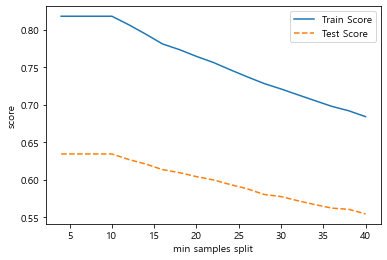

In [211]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

#!0

In [212]:
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=10
                                  , max_depth = v_max_depth,n_estimators =100)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.260,0.225
1,2,0.418,0.382
2,3,0.538,0.504
3,4,0.622,0.558
4,5,0.688,0.588
5,6,0.737,0.608
6,7,0.771,0.620
7,8,0.792,0.626
8,9,0.804,0.629
9,10,0.812,0.633


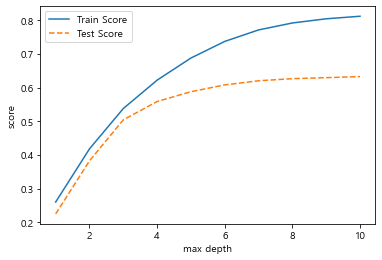

In [213]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [236]:
rf_final = RandomForestRegressor(min_samples_leaf = 5, min_samples_split = 10, max_depth = 4, random_state=1234,
                                n_estimators =100)
rf_final.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.622
Score on test set : 0.558


In [237]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
21,Thin F4,0.393
23,Thin F2,0.281
1,ppm,0.085
0,Temp_OXid,0.067
22,Thin F3,0.034
2,Pressure,0.030
4,thickness,0.016
15,temp_softbake,0.010
25,Temp_Etching,0.009
14,photoresist_bake,0.008


Text(0, 0.5, '변수')

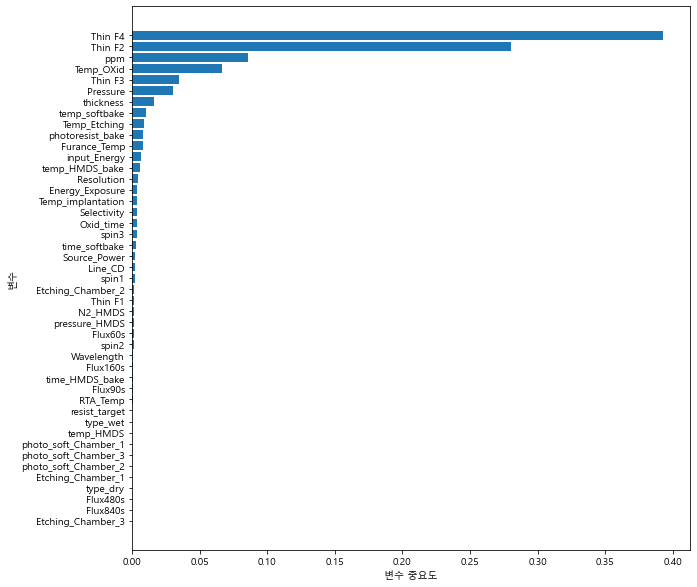

In [238]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그래디언트 부스팅

In [165]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_y,
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1022, 47)
train data Y size : (1022,)
test data X size : (682, 47)
test data Y size : (682,)


In [217]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.875
Score on test set : 0.710


In [218]:
train_score =[]
test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,15)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234,n_estimators =v_n_estimators )
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.480,0.455
1,20,0.645,0.586
2,30,0.719,0.639
3,40,0.759,0.660
4,50,0.796,0.689
5,60,0.813,0.695
6,70,0.830,0.701
7,80,0.849,0.705
8,90,0.862,0.707
9,100,0.875,0.710


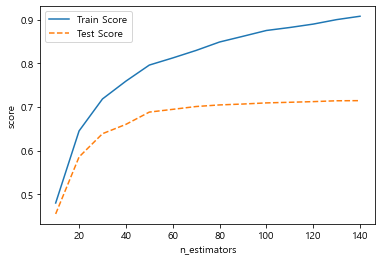

In [219]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

# 80

In [220]:
train_score =[]
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb =GradientBoostingRegressor(random_state = 1234,n_estimators =100,
                                min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.875,0.710
1,2,0.861,0.692
2,3,0.868,0.705
3,4,0.860,0.698
4,5,0.855,0.701
5,6,0.850,0.698
6,7,0.851,0.704
7,8,0.840,0.704
8,9,0.838,0.691
9,10,0.839,0.687


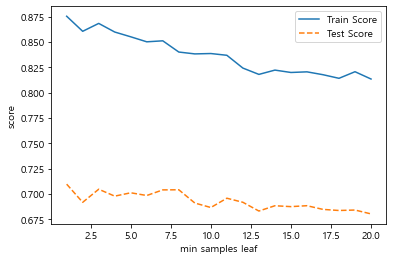

In [221]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

#9

In [222]:
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=8,
                         n_estimators =100, min_samples_split=v_min_samples_split )
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.840,0.704
1,4,0.840,0.704
2,6,0.840,0.704
3,8,0.840,0.704
4,10,0.840,0.704
5,12,0.840,0.704
6,14,0.840,0.704
7,16,0.840,0.704
8,18,0.842,0.706
9,20,0.847,0.708


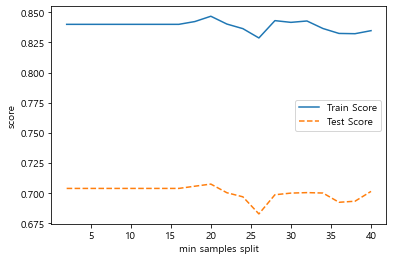

In [223]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

In [224]:
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20
                                  , max_depth = v_max_depth,n_estimators =100)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.558,0.519
1,2,0.737,0.655
2,3,0.847,0.708
3,4,0.919,0.719
4,5,0.952,0.725
5,6,0.977,0.732
6,7,0.980,0.737
7,8,0.983,0.736
8,9,0.984,0.734
9,10,0.986,0.730


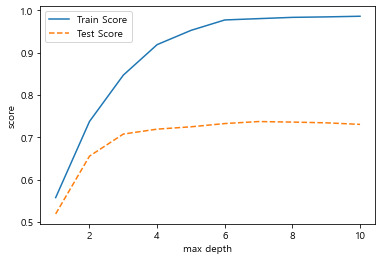

In [225]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [226]:
train_score = []
test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20
                                  , max_depth = 4,n_estimators =100, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.919,0.719
1,0.2,0.965,0.734
2,0.3,0.986,0.724
3,0.4,0.990,0.726
4,0.5,0.995,0.697
5,0.6,0.996,0.703
6,0.7,0.998,0.662
7,0.8,0.998,0.578
8,0.9,0.998,0.554


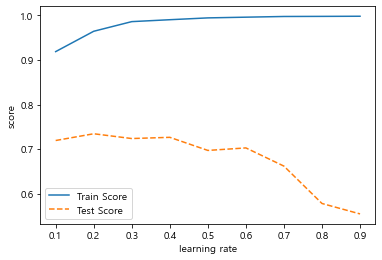

In [227]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel('score')
plt.xlabel('learning rate')
plt.legend()

#0.4

In [239]:
gb_final =GradientBoostingRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state=1234,
                                n_estimators =100, learning_rate = 0.4)
gb_final.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.990
Score on test set : 0.726


In [240]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
21,Thin F4,0.283
23,Thin F2,0.186
0,Temp_OXid,0.072
22,Thin F3,0.065
1,ppm,0.054
2,Pressure,0.032
14,photoresist_bake,0.032
35,Furance_Temp,0.020
3,Oxid_time,0.020
26,Source_Power,0.019


Text(0, 0.5, '변수')

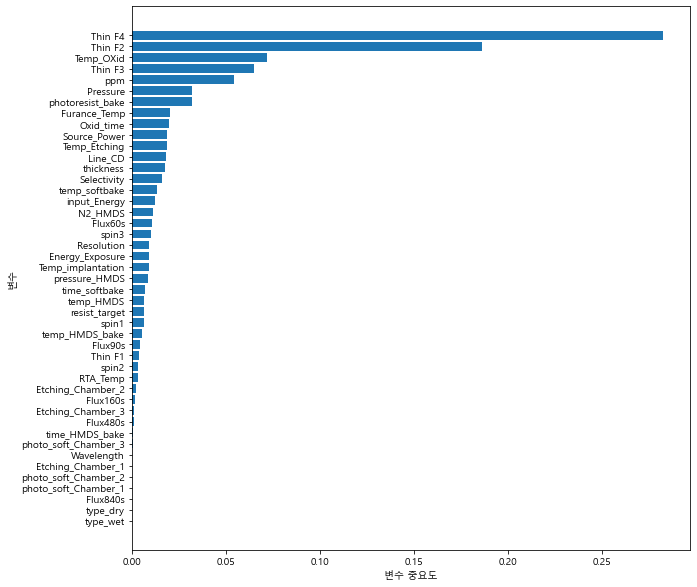

In [241]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")